In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as ss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
df = pd.read_csv('F:\\dev_stuff\\DSP_TIME_SERIES\\air+quality\\AirQualityUCI.csv',sep = ';')

# Combine the Date and Time columns into a single datetime column
df['datetime'] = df['Date'] + ' ' + df['Time']
c6h6 = [float(x.replace(',', '.')) for x in df["C6H6(GT)"].to_list()]

avg = [i for i in c6h6 if i != -200]
c6h6 = [i if i != -200 else np.mean(avg) for i in c6h6]





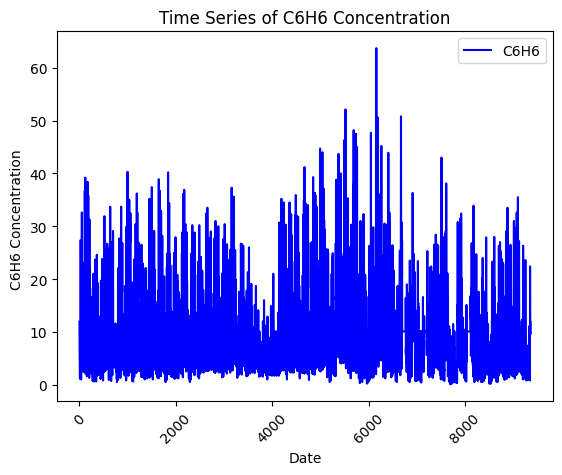

In [3]:
plt.plot(c6h6, label='C6H6', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('C6H6 Concentration ')
plt.title('Time Series of C6H6 Concentration')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

plt.show()

In [4]:
result = adfuller(c6h6)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -10.31486416717026
p-value: 3.1163185025317897e-18


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


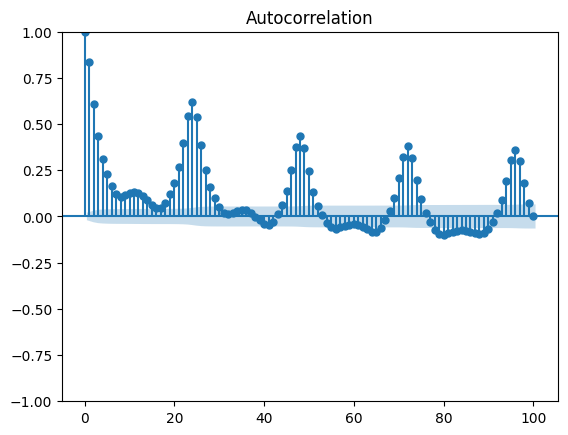

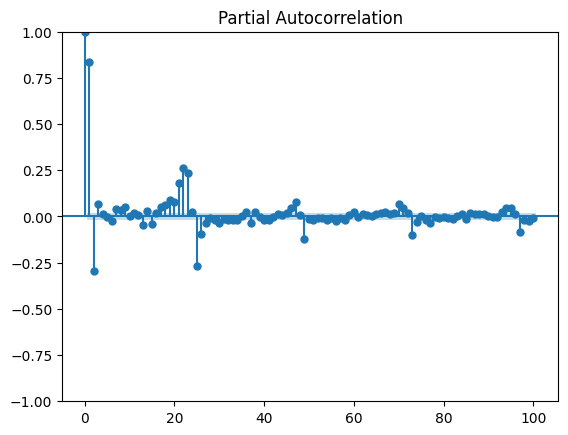

In [5]:
plot_acf(c6h6, lags = 100)
plot_pacf(c6h6, lags = 100)

plt.show()

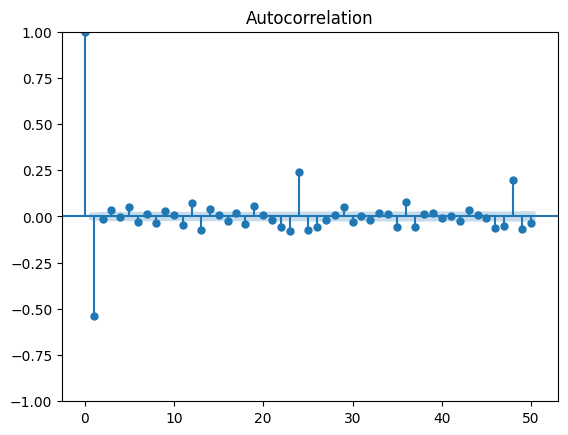

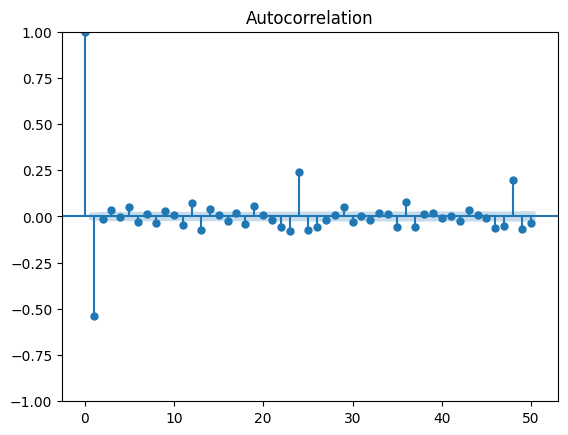

In [6]:
plot_acf(np.diff(np.diff(np.diff(c6h6))), lags = 50)#, lags = list(range(10)))


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 9357
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -24052.216
Date:                            Wed, 29 Jan 2025   AIC                          48114.433
Time:                                    18:46:45   BIC                          48150.138
Sample:                                         0   HQIC                         48126.561
                                           - 9357                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7816      0.006    141.210      0.000       0.771       0.792
ma.L1          0.1407      0.008   

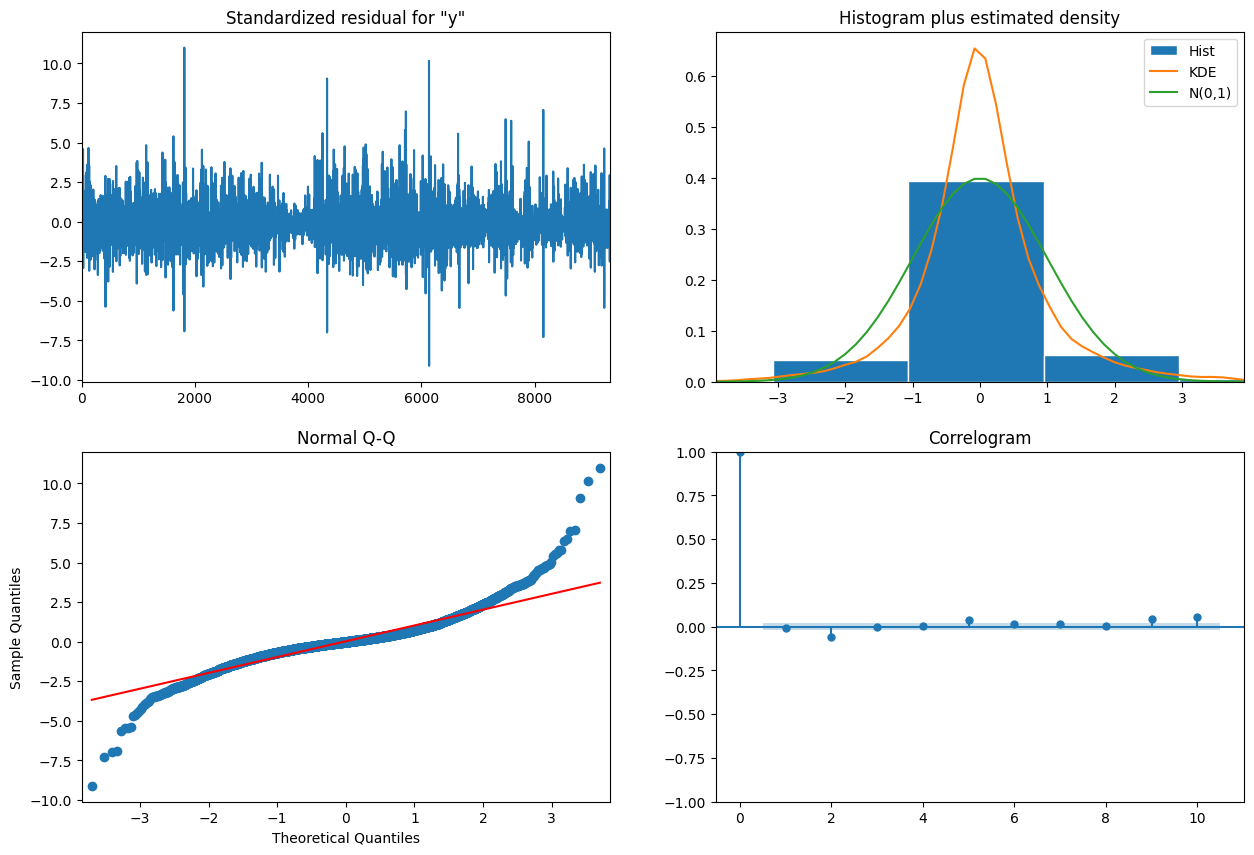

In [8]:
model = SARIMAX(c6h6, 
                order=(1, 0, 1), 
                seasonal_order=(1, 0, 1, 24), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(15, 10))
plt.show()



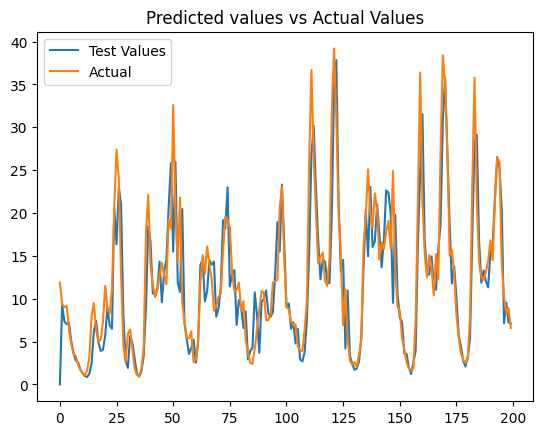

In [9]:
plt.plot(results.fittedvalues[:200], label = 'Test Values')
plt.plot(c6h6[:200], label = 'Actual')
plt.title("Predicted values vs Actual Values")
plt.legend()
plt.show()

In [10]:
def plot_actual_vs_forecast(actual, forecast, title="Actual vs Forecast", xlabel="Time", ylabel="Value"):
    plt.figure(figsize=(10, 6))
    
    # Plot actual data with a solid line
    plt.plot(actual, label='Actual', linestyle='-', linewidth=2, color='blue')
    
    # Plot forecast data with a dashed line
    plt.plot(list(range(len(actual), len(actual) + len(forecast))), forecast, label='Forecast', linestyle='--', linewidth=2, color='orange')
    
    # Add labels, title, and legend
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=12)
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Display the plot
    plt.show()

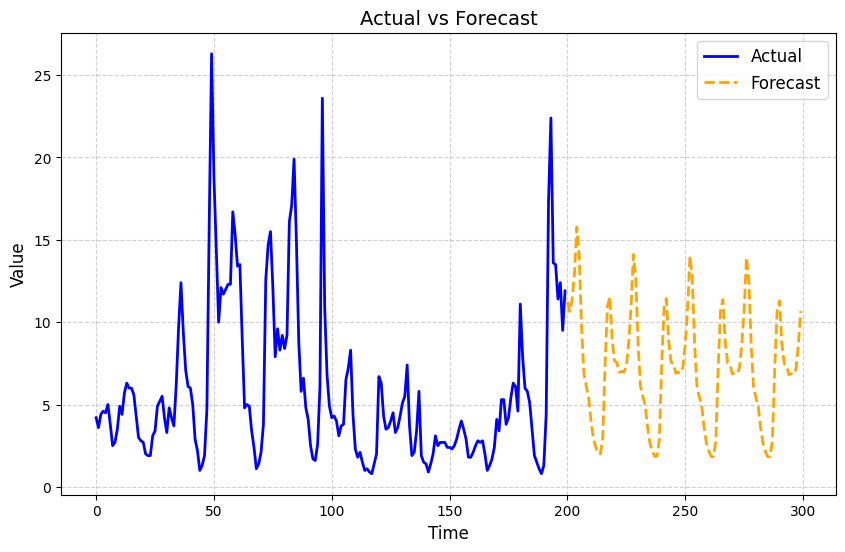

In [11]:
plot_actual_vs_forecast(c6h6[-200:], forecast = results.get_forecast(steps=100).predicted_mean)